In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [14]:
# Load your dataset
data_path = r"D:\AG Assignment\Dummy_Irrigation_Dataset.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()


,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage
0,2023-01-01,21.236204,43.260405,57.618343,22.763399,67.763918,3.378701,Seedling
1,2023-01-02,38.521429,46.363195,58.157143,27.865764,71.744921,5.571807,Seedling
2,2023-01-03,31.959818,26.130122,56.594576,24.165058,57.272464,3.540210,Seedling
3,2023-01-04,27.959755,18.851817,34.806348,25.912336,67.653485,1.774051,Seedling
4,2023-01-05,14.680559,22.977731,20.618265,33.829296,65.058859,2.412717,Seedling


In [15]:
irrigation_triggers = {
    'Seedling': {
        'Moisture_10cm': 15.6, 'Moisture_30cm': 24.0, 'Moisture_50cm': 34.5,
        'Temperature': 18.0, 'Humidity': 50.0, 'Rainfall': 5.0
    },
    'Vegetative': {
        'Moisture_10cm': 15.6, 'Moisture_30cm': 23.0, 'Moisture_50cm': 31.9,
        'Temperature': 20.0, 'Humidity': 45.0, 'Rainfall': 5.0
    },
    'Reproductive': {
        'Moisture_10cm': 18.2, 'Moisture_30cm': 21.4, 'Moisture_50cm': 30.9,
        'Temperature': 22.0, 'Humidity': 40.0, 'Rainfall': 3.0
    },
    'Ripening': {
        'Moisture_10cm': 17.0, 'Moisture_30cm': 24.4, 'Moisture_50cm': 25.1,
        'Temperature': 25.0, 'Humidity': 35.0, 'Rainfall': 2.0
    }
}

In [16]:
# Create the target column based on thresholds
def irrigation_needed(row):
    growth_stage = row['Growth_Stage']
    moisture_10cm = row['Soil_Moisture_10cm']
    moisture_30cm = row['Soil_Moisture_30cm']
    moisture_50cm = row['Soil_Moisture_50cm']
    temperature = row['Temperature']
    humidity = row['Humidity']
    rainfall = row['Rainfall']

    # Check if any threshold is not met
    if (moisture_10cm < irrigation_triggers[growth_stage]['Moisture_10cm'] or
        moisture_30cm < irrigation_triggers[growth_stage]['Moisture_30cm'] or
        moisture_50cm < irrigation_triggers[growth_stage]['Moisture_50cm'] or
        temperature < irrigation_triggers[growth_stage]['Temperature'] or
        humidity < irrigation_triggers[growth_stage]['Humidity'] or
        rainfall < irrigation_triggers[growth_stage]['Rainfall']):
        return 1  # Irrigation needed
    else:
        return 0  # No irrigation needed


In [17]:
data['Irrigation_Needed'] = data.apply(irrigation_needed, axis=1)

In [18]:
data

,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage,Irrigation_Needed
0,2023-01-01,21.236204,43.260405,57.618343,22.763399,67.763918,3.378701,Seedling,1
1,2023-01-02,38.521429,46.363195,58.157143,27.865764,71.744921,5.571807,Seedling,0
2,2023-01-03,31.959818,26.130122,56.594576,24.165058,57.272464,3.540210,Seedling,1
3,2023-01-04,27.959755,18.851817,34.806348,25.912336,67.653485,1.774051,Seedling,1
4,2023-01-05,14.680559,22.977731,20.618265,33.829296,65.058859,2.412717,Seedling,1
...,...,...,...,...,...,...,...,...,...
115,2023-04-26,36.143818,40.285824,45.696771,34.859296,58.437698,18.590583,Ripening,0
116,2023-04-27,34.110162,24.827033,21.060452,16.475931,70.053464,16.612388,Ripening,1
117,2023-04-28,15.597102,15.851059,43.431023,26.077086,40.339192,19.300538,Ripening,1
118,2023-04-29,36.776770,37.591530,57.609210,34.386051,41.537341,2.485944,Ripening,0


Class Counts:
Irrigation_Needed
1    96
0    24
Name: count, dtype: int64


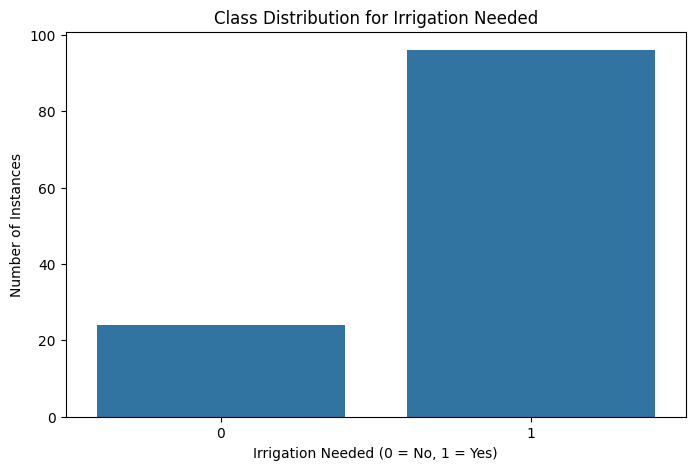

In [19]:
# Check the balance of the target variable
class_counts = data['Irrigation_Needed'].value_counts()
print("Class Counts:")
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution for Irrigation Needed')
plt.xlabel('Irrigation Needed (0 = No, 1 = Yes)')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()